In [2]:
#==========Imports==========
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import time

import Bell_EBM as ebm

In [4]:
#==========HighRes (Baseline) Creation==========
planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=1e3, nlat = 256, e=0.3)
star = ebm.Star(teff=6300., rad=1.59, mass=1.20)
system = ebm.System(star, planet)

Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*1
dt = system.planet.Porb/1000
baselineMaps, basettc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
baselineLightcurve = system.lightcurve()

In [7]:
#==========Tester Module==========

star = ebm.Star(teff=6300., rad=1.59, mass=1.20)
#T0 = 0.3*Teq*np.cos(system.planet.map.lonGrid)+0.5*Teq
Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*1
dt = system.planet.Porb/1000

#setnlat = 256
#anlat = setnlat; bnlat = setnlat; cnlat = setnlat; dnlat = setnlat; enlat = setnlat

#==========LowResAlpha Creation==========
anlat = 128. #nlat in test
#anlon = 32.

planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=1e3, nlat = anlat, e=0.3)
system = ebm.System(star, planet)
T0 = np.ones_like(system.planet.map.values)*Teq

alphaMaps, alphattc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
alphaLightcurve = system.lightcurve()

#==========LowResBeta Creation==========
bnlat = 112. #nlat in test
#bnlon = 26.

planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=1e3, nlat = bnlat, e=0.3)
system = ebm.System(star, planet)
T0 = np.ones_like(system.planet.map.values)*Teq

betaMaps, betattc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
betaLightcurve = system.lightcurve()

#==========LowResCharlie Creation==========
cnlat = 96. #nlat in test
#cnlon = 20.

planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=1e3, nlat = cnlat, e=0.3)
system = ebm.System(star, planet)
T0 = np.ones_like(system.planet.map.values)*Teq

charlieMaps, charliettc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
charlieLightcurve = system.lightcurve()

#==========LowResDelta Creation==========
dnlat = 80. #nlat in test
#dnlon = 16.

planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=1e3, nlat = dnlat, e=0.3)
system = ebm.System(star, planet)
T0 = np.ones_like(system.planet.map.values)*Teq

deltaMaps, deltattc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
deltaLightcurve = system.lightcurve()

#==========LowResEcho Creation==========
enlat = 192. #nlat in test
#enlon = 10.

planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=1e3, nlat = enlat, e=0.3)
system = ebm.System(star, planet)
T0 = np.ones_like(system.planet.map.values)*Teq

echoMaps, echottc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
echoLightcurve = system.lightcurve()

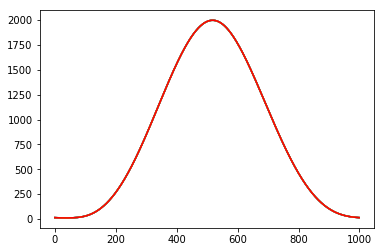

In [9]:
plt.plot((baselineLightcurve)*1e6, 'k')
plt.plot((alphaLightcurve)*1e6,'g')
plt.plot((betaLightcurve)*1e6,'c')
plt.plot((charlieLightcurve)*1e6,'m')
plt.plot((deltaLightcurve)*1e6,'y')
plt.plot((echoLightcurve)*1e6,'r')

Alpha ttc: 3102.47802734375 ms
Beta ttc: 2213.6130332946777 ms
Charlie ttc: 1717.1621322631836 ms
Deta ttc: 1180.431842803955 ms
Echo ttc: 7017.66300201416 ms


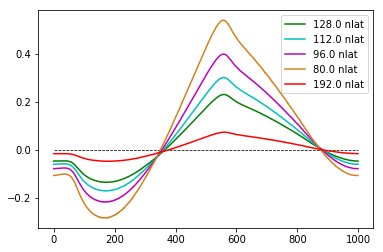

In [8]:
#baselineLightcurve, testLightcurve, baselineLightcurve - testLightcurve
plt.plot((baselineLightcurve-baselineLightcurve)*1e6, 'k', linestyle = "--", lw=0.75)
plt.plot((baselineLightcurve-alphaLightcurve)*1e6, 'g', label = (str(anlat) + ' nlat'))
plt.plot((baselineLightcurve-betaLightcurve)*1e6, "c", label = (str(bnlat) + ' nlat'))
plt.plot((baselineLightcurve-charlieLightcurve)*1e6, 'm', label = (str(cnlat) + ' nlat'))
plt.plot((baselineLightcurve-deltaLightcurve)*1e6, color='#d3811d', label = (str(dnlat) + ' nlat'))
plt.plot((baselineLightcurve-echoLightcurve)*1e6, 'r', label = (str(enlat) + ' nlat'))
plt.legend()
#plt.title('nlat set @ ' + str(setnlat))
print('Alpha ttc: ' + str(alphattc*1e3) + ' ms')
print('Beta ttc: ' + str(betattc*1e3) + ' ms')
print('Charlie ttc: ' + str(charliettc*1e3) + ' ms')
print('Deta ttc: ' + str(deltattc*1e3) + ' ms')
print('Echo ttc: ' + str(echottc*1e3) + ' ms')